In [2]:
# In this coding challenge, you will be asked to use what you have learned so far
# to try and "computationally" solve a realistic problem in materials science.

# The problem is the following.
# 
# A materials exists that is able to trap bacteria on it. This coating can be deposited as a series of N stripes of 
# width d, and N+1 stripes (without coating) of width d2, so that N*d + (N+1)*d2 = L, L being the size of the 
# surface, a square of L*L. We would like to understand what is the best value in terms of N and d that will allow 
# to make bacteria die faster.
#
# Why would bacteria die faster when trapped? Mainly, because they have less space to find food required to survive.
# At the same time, bacteria that are close to each other can form stronger colonies, in the sense that the probability
# for a bacteria to die because it has no food will depend on how many are present in its colony, so over-concentrating them in a single region
# might not be the best thing to do.
#
# Your "playground" for testing is a model where you have different colonies of bacteria (we'll specify it in a 
# second), residing on a square surface (your material) which has N stripes each of size d of coating. Beside
# bacteria, the surface also contains food.
#
#
# You are given the following rules for the behaviour of bacteria.
#
# 1) Each bacteria have a rate k_die that it will die. This means that in a time-step dt, the bacteria will die
#    with probability k_die( xx ). xx is the number of neighbours for a certain bacteria. This number is the 
#    number of bacteria whose Voronoi cell (considering only bacteria of the same colony) is adjacent to the 
#    Voronoi cell of the bacteria (i.e., they share an edge). The formula for it is
#    k_die( xx ) = k_die( 0 ) / xx 
#
# 2) A bacteria can duplicate with a rate k_replicate.
#
# 3) A bacteria can move with rate k_move. If it moves, its displacement in the x and y direction is taken 
#    taken from a Gaussian probability with mean = X and standard deviation = sigma  normal( mean, std ) -
#    note that DX and DY must be taken independently.
#    Importantly, if a bacteria is inside a coated region, the movement is allowed only if it keeps the bacteria 
#    in the coated region and rejected otherwise. A movement is also rejected if it brings the bacteria outside 
#    the surface.
#
# In practice, this means that at each step of evolution, you should pick for every bacteria 1) or 2) or 3) based
# on the formula
#
# p_i = k_i / sum(i) k_i, i=1,3 and p_i is the probability to do the corresponding action
#
#
# 4) If a bacteria lands within a distance R_eat of a piece of food, it eats it (immediately, in the same step). 
#    A bacteria that has just eaten cannot die for the next 10 steps.
#
#
# COLONY:
# Each bacteria belongs to one colony. The area of the colony is defined as the area of the convex hull 
# formed by the bacteria. Different bacterial colonies can interact with each other if their convex hull 
# overlaps( see Note 1 below ). The interaction between colonies can be different. 
#
# If the colonies interact in synergy, once they overlap they merge together in a single colony.
# If colonies compete, if they overlap bacteria kill each other through a fight (all within the same evolution step) 
# until their colonies do not overlap anymore in the following way: two bacteria (1 and 2), taken one each 
# randomly from the two different colonies fight each other based on their strength (S_1 or S_2). In practice, 
# the surviror is taken randomly with a probability that is proportional to p_1 =  S_1 / ( S_1 + S_2 ) and 
# p_2 = 1 - p_1
#
#
# PREPARE THE SYSTEM in a configuration
#
# SIMULATE TO MEASURE T_1/2, the time it takes so that the total number of bacteria decreases to half its
# initial value.
#
# FIND A VALUE FOR T_1/2 for 100 different (N,d) combinations. You must run many simulations, until the 
# value found for T_(1/2) is known with a standard deviation smaller than 0.2 T_1/2.
#
# Interpolate T_1/2( N, dd ) and use the interpolation function to determine its minimum
#
# Finally, make sure to print out the system state and visualize it as a series of convex hulls every 200 evolution
# steps. Besides that, also print another file where the position of each of the bacteria in the colony is given,
# as well as the food. You can do that in a file with format:
# Row 1: N_bacteria (total number) + N_food
# Row 2: empty
# Row 3: Symbol x y z
# (the same for ) N_bacteria + N_food + 2 rows.
# Symbol can be any element from the periodic table. Bacteria of different colonies should have different symbols.
# Food should have a different symbol too.
# 
#
#
#
# SYSTEM PREPARATION:
#
#
#
#
#
# VALUE OF PARAMETERS:
#
# k_die(0) = 5
# k_move = 50
# k_replicate = 5
# R_eat = 1
#
# Surface is a 2D square of 10 x 10
#
# Simulation 1: 
# 5 synergistic colonies of 100 bacteria each. Initially, each colony should be put randomly on the surface 
# so that all its bacteria are in a circle of radius 2. Within the circle, bacteria have random positions
#
# Simulation 2:
# As in in Simulation 1, but for competitive colonies. 
#
# Food:
# Put in each case 2000 food particles randomly on the surface.
#
# Strength (for fights only): the strength of a bacteria in a colony is given by 
#
# 10 / N_life + sqrt( N_colony ) + 10 / N_no_eat
#
# where N_life is the evolution steps passed since the bacteria is born (note that once a bacteria divide
# one of the copy has age 0, the other keeps its previous age ), N_colony is the number of bacteria in the 
# colony and N_no_eat the number of steps passed since the bacteria has eaten.
#
# 
#
#




In [5]:
from scipy.interpolate import griddata
import numpy as np
from matplotlib import pylab as plt
from scipy.interpolate import interp1d 

L = 30

a = list(np.random.uniform(2, L, 5))
b = list(np.random.uniform(2, L, 5))


aa = np.zeros(200)
bb = np.zeros(200)


#colony 1
for i in range(len(aa)):
    aa[i] = a[0]+2*np.random.uniform(-1,1,1)
    bb[i] = b[0]+2*np.random.uniform(-1,1,1)
x1 = []
y1 = []
for i in range(len(aa)):
    if np.sqrt((aa[i]-a[0])**2+(bb[i]-b[0])**2) < 2:
        x1.append(aa[i])
        y1.append(bb[i])
xx1= []
yy1 = []
for i in range(100):
    xx1.append(x1[i])
    yy1.append(y1[i])

    
#colony 2
for i in range(len(aa)):
    aa[i] = a[1]+2*np.random.uniform(-1,1,1)
    bb[i] = b[1]+2*np.random.uniform(-1,1,1)
x2 = []
y2 = []
for i in range(len(aa)):
    if np.sqrt((aa[i]-a[1])**2+(bb[i]-b[1])**2) < 2:
        x2.append(aa[i])
        y2.append(bb[i])
xx2 = []
yy2 = []
for i in range(100):
    xx2.append(x2[i])
    yy2.append(y2[i])

        
#colony 3        
for i in range(len(aa)):
    aa[i] = a[2]+2*np.random.uniform(-1,1,1)
    bb[i] = b[2]+2*np.random.uniform(-1,1,1)
x3 = []
y3 = []
for i in range(len(aa)):
    if np.sqrt((aa[i]-a[2])**2+(bb[i]-b[2])**2) < 2:
        x3.append(aa[i])
        y3.append(bb[i])
xx3 = []
yy3 = []
for i in range(100):
    xx3.append(x3[i])
    yy3.append(y3[i])
        
        
        
#colony 4
for i in range(len(aa)):
    aa[i] = a[3]+2*np.random.uniform(-1,1,1)
    bb[i] = b[3]+2*np.random.uniform(-1,1,1)
x4 = []
y4 = []
for i in range(len(aa)):
    if np.sqrt((aa[i]-a[3])**2+(bb[i]-b[3])**2) < 2:
        x4.append(aa[i])
        y4.append(bb[i])
xx4 = []
yy4 = []
for i in range(100):
    xx4.append(x4[i])
    yy4.append(y4[i])

       
            
#colony 5      
for i in range(len(aa)):
    aa[i] = a[4]+2*np.random.uniform(-1,1,1)
    bb[i] = b[4]+2*np.random.uniform(-1,1,1)
x5 = []
y5 = []
for i in range(len(aa)):
    if np.sqrt((aa[i]-a[4])**2+(bb[i]-b[4])**2) < 2:
        x5.append(aa[i])
        y5.append(bb[i])
xx5 = []
yy5 = []
for i in range(100):
    xx5.append(x5[i])
    yy5.append(y5[i])
print(len(xx5))


bdry = []
for i in range(L+1):
    bdry.append(i)
print(bdry)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [7]:
class bacteria():
    def __init__(self, colony,pos):
        self.colony = colony
        self.age = 0 #initial age is 0, afterwards just update it using .age attribute
        self.nn = 0 #initial no of nearest neighbours (Voronoi)
        self.pos = pos #position of bacteria
        self.eat = 0 #initially= 0 (0 = have not eaten, 1=eaten)
        return
    
all_bacteria = []

for i in range(100):
    all_bacteria.append(bacteria("A",[0,0])) #try to input the initial positions of bacteria here
    
for i in range(100):
    all_bacteria.append(bacteria("B",[0,0]))

for i in range(100):
    all_bacteria.append(bacteria("C",[0,0]))

for i in range(100):
    all_bacteria.append(bacteria("D",[0,0]))

for i in range(100):
    all_bacteria.append(bacteria("E",[0,0]))

print(all_bacteria[88].colony)
print(all_bacteria[88].age)
print(all_bacteria[88].nn)
print(all_bacteria[88].pos)
print(all_bacteria[88].eat)


A
0
0
[0, 0]
0


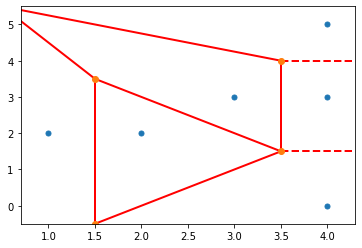

1.6666666666666667


In [10]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt
def die(pos):
    initial_array = [[1,2],[4,5],[4,0],[4,3],[2,2],[3,3]] #can be any array, example array shown here
    indexnumber = list(initial_array).index(pos) #returns the index of pos in initial_array
    pos_array=np.array(initial_array) #transforms initial_array into numpy array
    vor=Voronoi(pos_array) #plotting Voronoi cells for all bacteria
    fig = voronoi_plot_2d( vor, show_vertices = True, line_colors = 'red',line_width = 2, point_size=10 )
    plt.show()
    region_index=vor.point_region[indexnumber] #.point_region returns the index of region that pos (input) is in
    nn=len(np.array(vor.regions[region_index])) #.regions returns indices of vertices of region_index
    k_die=5/nn
    return k_die

    #nn is number of neighbours
a=die([2,2])
print(a)

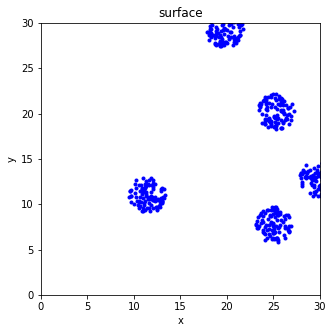

In [4]:
plt.figure(figsize = (5,5))
plt.xlim(0,L)
plt.ylim(0,L)

plt.plot( xx1, yy1 , 'b.' )
plt.plot( xx2, yy2 , 'b.' )
plt.plot( xx3, yy3 , 'b.' )
plt.plot( xx4, yy4 , 'b.' )
plt.plot( xx5, yy5 , 'b.' )

plt.xlabel("x")
plt.ylabel("y")
plt.title("surface")
plt.show()